### **一、加载常用库**

In [11]:
import scipy as sp
import numpy as np
import pandas as pd
import gc
pd.set_option('display.max_columns', None)

In [2]:
import seaborn as sns
from numpy.random import randn
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
# style set 这里只是一些简单的style设置
plt.rcParams['figure.figsize'] = (12, 6)

### **二、读取alpha数据并合并，存入h5**

#### **1、读取get_alpha_n135生成的alphas数据（10组），然后concat，最后存入h5**

#读取数据
alphas_group1 = pd.read_hdf('alphas.h5', key='alphas_group1')
alphas_group2 = pd.read_hdf('alphas.h5', key='alphas_group2')
alphas_group3 = pd.read_hdf('alphas.h5', key='alphas_group3')
alphas_group4 = pd.read_hdf('alphas.h5', key='alphas_group4')
alphas_group5 = pd.read_hdf('alphas.h5', key='alphas_group5')
alphas_group6 = pd.read_hdf('alphas.h5', key='alphas_group6')
alphas_group7 = pd.read_hdf('alphas.h5', key='alphas_group7')
alphas_group8 = pd.read_hdf('alphas.h5', key='alphas_group8')
alphas_group9 = pd.read_hdf('alphas.h5', key='alphas_group9')
alphas_group10 = pd.read_hdf('alphas.h5', key='alphas_group10')

#concat前五组
alphas_n135_12345 = pd.concat([alphas_group1,alphas_group2,alphas_group3,alphas_group4,alphas_group5], ignore_index=True)

#转数据类型
alphas_n135_12345.iloc[:,2:160] = alphas_n135_12345.iloc[:,2:160].astype('float32')

#concat后五组
alphas_n135_67890 = pd.concat([alphas_group6,alphas_group7,alphas_group8,alphas_group9,alphas_group10], ignore_index=True)

#转数据类型
alphas_n135_67890.iloc[:,2:160] = alphas_n135_67890.iloc[:,2:160].astype('float32')

#concat所有
alphas_n135 = pd.concat([alphas_n135_12345,alphas_n135_67890], ignore_index=True)

#alphas_n135的date列含有str，转成datetime
alphas_n135['date'] = pd.to_datetime(alphas_n135['date'])

In [4]:
alphas_n135 = pd.read_hdf('process_alphas.h5', key = 'process_alphas_n135')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_944\2725397205.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  alphas_n135 = pd.read_hdf('process_alphas.h5', key = 'process_alphas_n135')


In [5]:
alphas_n135

,code,date,open,high,low,close,volumn,amount,value,return,industry,Opnindex,Hiindex,Loindex,Clsindex,Retindex,alpha_1,alpha_2,alpha_5,alpha_6,alpha_7,alpha_8,alpha_9,alpha_11,alpha_12,alpha_13,alpha_14,alpha_15,alpha_16,alpha_17,alpha_18,alpha_20,alpha_22,alpha_24,alpha_25,alpha_26,alpha_28,alpha_29,alpha_31,alpha_32,alpha_33,alpha_34,alpha_35,alpha_36,alpha_37,alpha_39,alpha_41,alpha_42,alpha_44,alpha_45,alpha_46,alpha_47,alpha_48,alpha_52,alpha_54,alpha_57,alpha_60,alpha_61,alpha_62,alpha_63,alpha_64,alpha_65,alpha_66,alpha_67,alpha_68,alpha_70,alpha_71,alpha_72,alpha_73,alpha_74,alpha_76,alpha_77,alpha_78,alpha_79,alpha_80,alpha_81,alpha_82,alpha_83,alpha_85,alpha_87,alpha_88,alpha_89,alpha_90,alpha_91,alpha_92,alpha_95,alpha_96,alpha_97,alpha_99,alpha_100,alpha_102,alpha_104,alpha_105,alpha_106,alpha_107,alpha_108,alpha_109,alpha_110,alpha_111,alpha_113,alpha_114,alpha_115,alpha_117,alpha_118,alpha_119,alpha_120,alpha_121,alpha_122,alpha_124,alpha_125,alpha_126,alpha_130,alpha_131,alpha_132,alpha_134,alpha_135,alpha_136,alpha_138,alpha_139,alpha_140,alpha_141,alpha_142,alpha_145,alpha_146,alpha_150,alpha_151,alpha_152,alpha_153,alpha_155,alpha_156,alpha_157,alpha_158,alpha_159,alpha_161,alpha_162,alpha_163,alpha_168,alpha_169,alpha_170,alpha_171,alpha_173,alpha_175,alpha_176,alpha_178,alpha_179,alpha_181,alpha_184,alpha_185,alpha_188,alpha_189,alpha_191
0,1,2010-01-04,24.520,24.580000,23.680000,23.709999,24192276.0,5.802495e+08,73629832.0,-0.027082,480101.0,3592.468018,3597.748047,3535.229004,3535.229004,-0.011314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.140898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.419228e+07,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.987346,NaN,NaN,NaN,NaN,23.990000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.803727e+08,NaN,NaN,NaN,0.000000e+00,NaN,NaN,0.037959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.040789,26.875896,NaN,NaN,NaN,NaN,NaN,NaN,0.079902,0.000000,NaN,NaN
1,1,2010-01-05,23.750,23.900000,22.750000,23.299999,55649984.0,1.293477e+09,72356608.0,-0.017292,480101.0,3545.186035,3577.525879,3497.660889,3564.038086,0.008149,NaN,-0.889855,NaN,NaN,NaN,NaN,-1.663522e-08,NaN,NaN,0.074833,NaN,0.001687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,-1.663522e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.718825e+07,NaN,NaN,NaN,NaN,NaN,-0.052330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,-0.008033,NaN,1.043956,NaN,-6.414512e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.257376,NaN,-0.000020,inf,NaN,23.316668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.297572e+09,NaN,NaN,NaN,2.007557e+06,NaN,NaN,0.049356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.008672,26.706011,NaN,NaN,-962315.187500,NaN,NaN,NaN,0.230984,21.634615,NaN,NaN
2,1,2010-01-06,23.250,23.250000,22.719999,22.900000,41214312.0,9.444537e+08,71114432.0,-0.017167,480101.0,3558.699951,3588.832031,3541.173096,3541.727051,-0.006260,NaN,0.277276,NaN,NaN,NaN,NaN,-1.313152e-08,NaN,NaN,0.067800,NaN,-0.002146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,-1.500016e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.852406e+07,NaN,NaN,NaN,NaN,NaN,-0.133322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.593689,NaN,NaN,NaN,-0.014460,NaN,0.960941,NaN,-5.019090e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.609414,NaN,-0.000071,-inf,NaN,22.956667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.461432e+08,NaN,NaN,NaN,2.234790e+06,-0.880936,NaN,0.023144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.554807,26.412832,NaN,NaN,-707541.875000,NaN,NaN,NaN,0.311235,-39.074673,NaN,NaN
3,1,2010-01-07,22.900,23.049999,22.400000,22.650000,35533684.0,8.041663e+08,7

#### **2、读取get_alpha_n46生成的alphas_rest数据（10组），然后concat，最后存入h5**

#concat所有
alphas_n46 = pd.concat([alphas_rest_group1,alphas_rest_group2,alphas_rest_group3,alphas_rest_group4,alphas_rest_group5,alphas_rest_group6,alphas_rest_group7,alphas_rest_group8,alphas_rest_group9,alphas_rest_group10], ignore_index=True)

#转数据类型
alphas_n46.iloc[:,2:61] = alphas_n46.iloc[:,2:62].astype('float32')

#alphas_n46存入h5
alphas_n46.to_hdf('process_alphas.h5', key = 'process_alphas_n46')

alphas_n46 = alphas_n46.groupby('code').apply(lambda x: x.drop(x.head(20).index))

### **三、分别合并风格因子与135和46并存入hdf**

#### **1、导入alphas135和alphas46数据**

In [3]:
alphas_n135 = pd.read_hdf('C:/Users/Administrator/Downloads/alpha191/process_alphas.h5', key='process_alphas_n135')
#alphas_n46 = pd.read_hdf('C:/Users/Administrator/Downloads/alpha191/process_alphas.h5', key='process_alphas_n46')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10900\417180319.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  alphas_n135 = pd.read_hdf('C:/Users/Administrator/Downloads/alpha191/process_alphas.h5', key='process_alphas_n135')


In [4]:
alphas_n46 = pd.read_hdf('C:/Users/Administrator/Downloads/alpha191/process_alphas.h5', key='process_alphas_n46')

<AxesSubplot:>

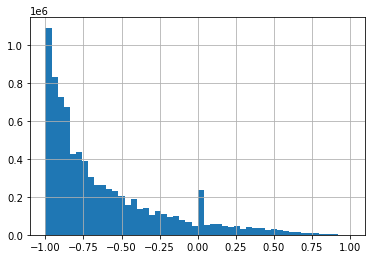

In [24]:
alphas_n135['alpha_5'].hist(bins = 50)

In [12]:
alphas_n135

,code,date,open,high,low,close,volumn,amount,value,return,industry,Opnindex,Hiindex,Loindex,Clsindex,Retindex,alpha_1,alpha_2,alpha_5,alpha_6,alpha_7,alpha_8,alpha_9,alpha_11,alpha_12,alpha_13,alpha_14,alpha_15,alpha_16,alpha_17,alpha_18,alpha_20,alpha_22,alpha_24,alpha_25,alpha_26,alpha_28,alpha_29,alpha_31,alpha_32,alpha_33,alpha_34,alpha_35,alpha_36,alpha_37,alpha_39,alpha_41,alpha_42,alpha_44,alpha_45,alpha_46,alpha_47,alpha_48,alpha_52,alpha_54,alpha_57,alpha_60,alpha_61,alpha_62,alpha_63,alpha_64,alpha_65,alpha_66,alpha_67,alpha_68,alpha_70,alpha_71,alpha_72,alpha_73,alpha_74,alpha_76,alpha_77,alpha_78,alpha_79,alpha_80,alpha_81,alpha_82,alpha_83,alpha_85,alpha_87,alpha_88,alpha_89,alpha_90,alpha_91,alpha_92,alpha_95,alpha_96,alpha_97,alpha_99,alpha_100,alpha_102,alpha_104,alpha_105,alpha_106,alpha_107,alpha_108,alpha_109,alpha_110,alpha_111,alpha_113,alpha_114,alpha_115,alpha_117,alpha_118,alpha_119,alpha_120,alpha_121,alpha_122,alpha_124,alpha_125,alpha_126,alpha_130,alpha_131,alpha_132,alpha_134,alpha_135,alpha_136,alpha_138,alpha_139,alpha_140,alpha_141,alpha_142,alpha_145,alpha_146,alpha_150,alpha_151,alpha_152,alpha_153,alpha_155,alpha_156,alpha_157,alpha_158,alpha_159,alpha_161,alpha_162,alpha_163,alpha_168,alpha_169,alpha_170,alpha_171,alpha_173,alpha_175,alpha_176,alpha_178,alpha_179,alpha_181,alpha_184,alpha_185,alpha_188,alpha_189,alpha_191
0,1,2010-01-04,24.520,24.580000,23.680000,23.709999,24192276.0,5.802495e+08,73629832.0,-0.027082,480101.0,3592.468018,3597.748047,3535.229004,3535.229004,-0.011314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.140898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.419228e+07,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.987346,NaN,NaN,NaN,NaN,23.990000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.803727e+08,NaN,NaN,NaN,0.000000e+00,NaN,NaN,0.037959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.040789,26.875896,NaN,NaN,NaN,NaN,NaN,NaN,0.079902,0.000000,NaN,NaN
1,1,2010-01-05,23.750,23.900000,22.750000,23.299999,55649984.0,1.293477e+09,72356608.0,-0.017292,480101.0,3545.186035,3577.525879,3497.660889,3564.038086,0.008149,NaN,-0.889855,NaN,NaN,NaN,NaN,-1.663522e-08,NaN,NaN,0.074833,NaN,0.001687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,-1.663522e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.718825e+07,NaN,NaN,NaN,NaN,NaN,-0.052330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,-0.008033,NaN,1.043956,NaN,-6.414512e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.257376,NaN,-0.000020,inf,NaN,23.316668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.297572e+09,NaN,NaN,NaN,2.007557e+06,NaN,NaN,0.049356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.008672,26.706011,NaN,NaN,-962315.187500,NaN,NaN,NaN,0.230984,21.634615,NaN,NaN
2,1,2010-01-06,23.250,23.250000,22.719999,22.900000,41214312.0,9.444537e+08,71114432.0,-0.017167,480101.0,3558.699951,3588.832031,3541.173096,3541.727051,-0.006260,NaN,0.277276,NaN,NaN,NaN,NaN,-1.313152e-08,NaN,NaN,0.067800,NaN,-0.002146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,-1.500016e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.852406e+07,NaN,NaN,NaN,NaN,NaN,-0.133322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.593689,NaN,NaN,NaN,-0.014460,NaN,0.960941,NaN,-5.019090e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.609414,NaN,-0.000071,-inf,NaN,22.956667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.461432e+08,NaN,NaN,NaN,2.234790e+06,-0.880936,NaN,0.023144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.554807,26.412832,NaN,NaN,-707541.875000,NaN,NaN,NaN,0.311235,-39.074673,NaN,NaN
3,1,2010-01-07,22.900,23.049999,22.400000,22.650000,35533684.0,8.041663e+08,7

In [13]:
alphas_n46

,code,date,open,high,low,close,volumn,amount,value,return,industry,Opnindex,Hiindex,Loindex,Clsindex,Retindex,alpha_3,alpha_4,alpha_10,alpha_19,alpha_23,alpha_27,alpha_38,alpha_40,alpha_43,alpha_49,alpha_50,alpha_51,alpha_53,alpha_55,alpha_56,alpha_58,alpha_59,alpha_69,alpha_75,alpha_84,alpha_86,alpha_93,alpha_94,alpha_98,alpha_101,alpha_103,alpha_112,alpha_123,alpha_127,alpha_128,alpha_129,alpha_133,alpha_137,alpha_144,alpha_148,alpha_154,alpha_160,alpha_164,alpha_167,alpha_172,alpha_174,alpha_177,alpha_180,alpha_182,alpha_186,alpha_187
0,1,2010-01-04,24.520,24.580000,23.680000,23.709999,24192276.0,5.802495e+08,73629832.0,-0.027082,480101.0,3592.468018,3597.748047,3535.229004,3535.229004,-0.011314,NaN,0.0,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.0,NaN,NaN,0.000000,NaN,-24192276.0,NaN,NaN,NaN
1,1,2010-01-05,23.750,23.900000,22.750000,23.299999,55649984.0,1.293477e+09,72356608.0,-0.017292,480101.0,3545.186035,3577.525879,3497.660889,3564.038086,0.008149,NaN,0.0,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,-17.650259,NaN,0.0,0.0,0.000000,0.0,NaN,NaN,0.000000,NaN,-55649984.0,NaN,NaN,NaN
2,1,2010-01-06,23.250,23.250000,22.719999,22.900000,41214312.0,9.444537e+08,71114432.0,-0.017167,480101.0,3558.699951,3588.832031,3541.173096,3541.727051,-0.006260,NaN,0.0,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,-13.257143,NaN,0.0,0.0,0.000000,0.0,NaN,NaN,0.000000,NaN,-41214312.0,NaN,NaN,NaN
3,1,2010-01-07,22.900,23.049999,22.400000,22.650000,35533684.0,8.041663e+08,70338072.0,-0.010917,480101.0,3543.159912,3558.555908,3452.769043,3471.456055,-0.019841,NaN,0.0,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,1.060,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,-8.754717,NaN,0.0,0.0,0.000000,0.0,NaN,NaN,0.000000,NaN,-35533684.0,NaN,NaN,NaN
4,1,2010-01-08,22.500,22.750000,22.350000,22.600000,28854306.0,6.506674e+08,70182800.0,-0.002208,480101.0,3456.907959,3482.083008,3426.697998,3480.129883,0.002499,NaN,0.0,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.700,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,-2.909091,NaN,0.0,0.0,0.000000,0.0,NaN,NaN,0.000000,NaN,-28854306.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8672604,900957,2022-01-24,0.633,0.638000,0.615000,0.621000,479100.0,2.998840e+05,216729.0,-0.026646,620201.0,4753.940918,4801.098145,4746.448242,4786.737793,0.001553,-0.011,1.0,0.500171,-0.037209,44.524231,102.079529,0.0,130.661041,-264100.0,0.666667,-0.333333,0.333333,5.0,-2.922807,1.0,9.0,0.022,0.609091,0.25,2556496.0,1.0,0.043,1187732.0,-0.017,0.0,100.0,-43.478260,0.0,94.659042,57.465527,0.033,-65.0,-0.328851,7.767254e-08,0.0,0.0,0.005053,6813988.5,0.013,63.452248,0.004055,35.0,57.5,0.65,78.296608,0.110
8672605,900957,2022-01-25,0.617,0.620000,0.607000,0.611000,372779.0,2.281030e+05,213239.0,-0.016103,620201.0,4761.950195,4781.391113,4678.247070,4678.451172,-0.022622,-0.021,1.0,0.500171,-0.054180,42.153522,57.811867,0.0,121.045235,-636879.0,0.775000,-0.550000,0.225000,5.0,-44.579952,1.0,8.0,-0.001,0.447917,0.25,2067985.0,1.0,0.053,1023453.0,-0.007,0.0,100.0,-53.571430,0.0,94.679901,27.816076,0.043,-70.0,-0.320000,7.688621e-08,0.0,1.0,0.005287,5765682.5,0.013,61.149216,0.003853,30.0,60.0,0.65,76.239700,0.096
8672606,900957,2022-01-26,0.614,0.617000,0.610000,0.614000,222600.0,1.362910e+05,214286.0,0.004910,620201.0,4697.099121,4718.995117,4648.127930,4712.311035,0.007237,-0.019,1.0,0.500171,-0.051005,45.585140,37.321476,0.0,134.268433,-504579.0,0.772152,-0.544304,0.227848,6.

In [ ]:
#将alphas_n135的date列to_datetime
alphas_n135['date'] = pd.to_datetime(alphas_n135['date'])

In [ ]:
#丢弃alphas_n135不需要的列
alphas_n135.drop(columns = ['open','high','low','close','volumn','amount','value','Opnindex','Hiindex','Loindex','Clsindex','Retindex'], inplace = True)

In [ ]:
#丢弃alphas_n46不需要的列
alphas_n46.drop(columns = ['open','high','low','close','volumn','amount','value','Opnindex','Hiindex','Loindex','Clsindex','Retindex'], inplace = True)

#### **2、导入风格因子数据，并与alphas合并**

In [ ]:
style_factor_f520 = pd.read_hdf('C:/Users/Administrator/Downloads/alpha191/style_factor_f520.h5', key='style_factor_f520')

In [ ]:
style_factor_f520

In [ ]:
alphas135_style = pd.merge(style_factor_f520,alphas_n135, on = ['code','date'], how = 'left')

In [ ]:
alphas46_style = pd.merge(style_factor_f520,alphas_n46, on = ['code','date'], how = 'left')

#### **3、存入hdf**

In [ ]:
alphas135_style.to_hdf('D:/191alphas/alphas135_style.h5',key = 'alphas135_style')

In [ ]:
alphas46_style.to_hdf('D:/191alphas/alphas46_style.h5',key = 'alphas46_style')